## **Mood-Based Music Recommendation System Using XGBoost and Spotify Data**

_by: Nanda Akhirdianto_

##### **Background**

In the digital age, music streaming platforms have become a primary source of music consumption. With the vast amount of music available, it can be challenging for users to discover songs that match their current mood. A personalized music recommendation system can enhance the user experience by suggesting songs that align with the user's emotional state. By leveraging machine learning techniques and data from Spotify, we aim to develop a system that can accurately recommend songs based on the user's mood.

##### **Objectives**

1. To develop a music recommendation system that suggests songs based on the user's current mood.
2. To utilize Spotify's API to gather data on various song features and user moods.
3. To preprocess and analyze the data to extract relevant features for the recommendation model.
4. To build and train a machine learning model using XGBoost to predict the mood of a song.
5. To evaluate the performance of the model and fine-tune it for optimal recommendations.
6. To create a web application using Dash for an interactive and user-friendly interface.

##### **Data**

- Source: Spotify API
- Features: The dataset includes various features of songs such as valence, energy, danceability, tempo, loudness, speechiness, acousticness, instrumentalness, liveness, and genres. Additionally, the dataset contains the mood associated with each song (e.g., Happy, Energetic, Sad, Relaxed).

##### **Tools and Technology**
1. **Data Collection and Preprocessing:**

- Python
- Pandas
- Spotify API

2. **Machine Learning:**

- XGBoost (for model training and prediction)
- Scikit-learn (for data preprocessing and model evaluation)
- Joblib (for saving and loading the model and scaler)

3. **Data Visualization:**

- Matplotlib
- Seaborn

4. **Web Application Development:**

- Dash (for building the interactive web app)
- Plotly (for interactive plots and visualizations)

##### **Method**

1. **Data Collection:** Use Spotify's API to scrape song data including features and mood labels.
2. **Data Exploration:** Analyze the distribution of features and moods to understand the dataset better.
3. **Data Preprocessing:**
- Handle missing values and outliers.
- Encode categorical variables like genres and mood.
- Standardize the features for uniformity.
4. **Feature Engineering:** Select relevant features that contribute significantly to the mood prediction.
5. **Model Training:**
- Split the data into training and testing sets.
- Train an XGBoost model on the training data.
- Evaluate the model using metrics like accuracy, precision, and recall.
- Hyperparameter Tuning: Use GridSearchCV to find the best hyperparameters for the XGBoost model.
6. **Model Evaluation:** Evaluate the performance of the best model on the test set and save the model and scaler using Joblib.
7. **Recommendation System:**
- Implement a function to recommend similar songs based on the predicted mood.
- Use the trained model to predict the mood of a selected song and find other songs with the same mood.
8. **Web Application:** Develop a user-friendly web app using Dash to allow users to input a song and receive mood-based recommendations.

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load data
df = pd.read_csv('spotify_track_data.csv')
print(df.head())

                       id                           name        artist  \
0  331l3xABO0HMr1Kkyh2LZq             I Don't Wanna Wait  David Guetta   
1  3aoZg6tWk6oV6FdtQkyNmt   Love Me Now (feat. Zoe Wees)          Kygo   
2  4uUG5RXrOk84mYEfFvj3cK                I'm Good (Blue)  David Guetta   
3  4QfikoJtCEiOj7G5R9m3sP  For Life (feat. Nile Rodgers)          Kygo   
4  7j57nadsCph2KI9eYuaum8                   The Hard Way          PNAU   

   valence  energy  danceability    tempo  \
0    0.554   0.714         0.681  129.976   
1    0.511   0.485         0.664  102.030   
2    0.304   0.965         0.561  128.040   
3    0.585   0.791         0.571  122.085   
4    0.657   0.906         0.691  119.978   

                                              genres  duration (ms)  explicit  \
0  ['big room', 'dance pop', 'edm', 'pop', 'pop d...         149668     False   
1      ['edm', 'pop', 'pop dance', 'tropical house']         195880     False   
2  ['big room', 'dance pop', 'edm', 'pop'

In [3]:
# Display basic information about the data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                602 non-null    object 
 1   name              602 non-null    object 
 2   artist            602 non-null    object 
 3   valence           602 non-null    float64
 4   energy            602 non-null    float64
 5   danceability      602 non-null    float64
 6   tempo             602 non-null    float64
 7   genres            602 non-null    object 
 8   duration (ms)     602 non-null    int64  
 9   explicit          602 non-null    bool   
 10  key               602 non-null    int64  
 11  loudness          602 non-null    float64
 12  mode              602 non-null    int64  
 13  speechiness       602 non-null    float64
 14  acousticness      602 non-null    float64
 15  instrumentalness  602 non-null    float64
 16  liveness          602 non-null    float64
 1

(602, 18)

There's no missing values, so we can continue to the next step

In [4]:
# Show descriptive statistics
df.describe()

,valence,energy,danceability,tempo,duration (ms),key,loudness,mode,speechiness,acousticness,instrumentalness,liveness
count,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000,602.000000
mean,0.426306,0.547352,0.596312,119.455733,203140.448505,5.161130,-8.179409,0.696013,0.060701,0.391620,0.047275,0.169779
std,0.228839,0.217930,0.138936,27.084253,50057.980085,3.498364,3.905655,0.460359,0.054240,0.331910,0.163040,0.125983
min,0.036200,0.016700,0.215000,56.829000,60720.000000,0.000000,-26.813000,0.000000,0.023200,0.000008,0.000000,0.032200
25%,0.243000,0.385500,0.504250,100.710000,174841.250000,2.000000,-9.845250,0.000000,0.033425,0.073900,0.000000,0.096700
50%,0.402500,0.557500,0.612000,120.043500,197686.000000,5.000000,-7.320500,1.000000,0.042400,0.311000,0.000007,0.118000
75%,0.589000,0.726000,0.695750,133.989500,229159.750000,8.000000,-5.445250,1.000000,0.064475,0.719250,0.000955,0.196750
max,0.972000,0.965000,0.943000,207.970000,613027.000000,11.000000,-2.095000,1.000000,0.480000,0.987000,0.970000,0.911000


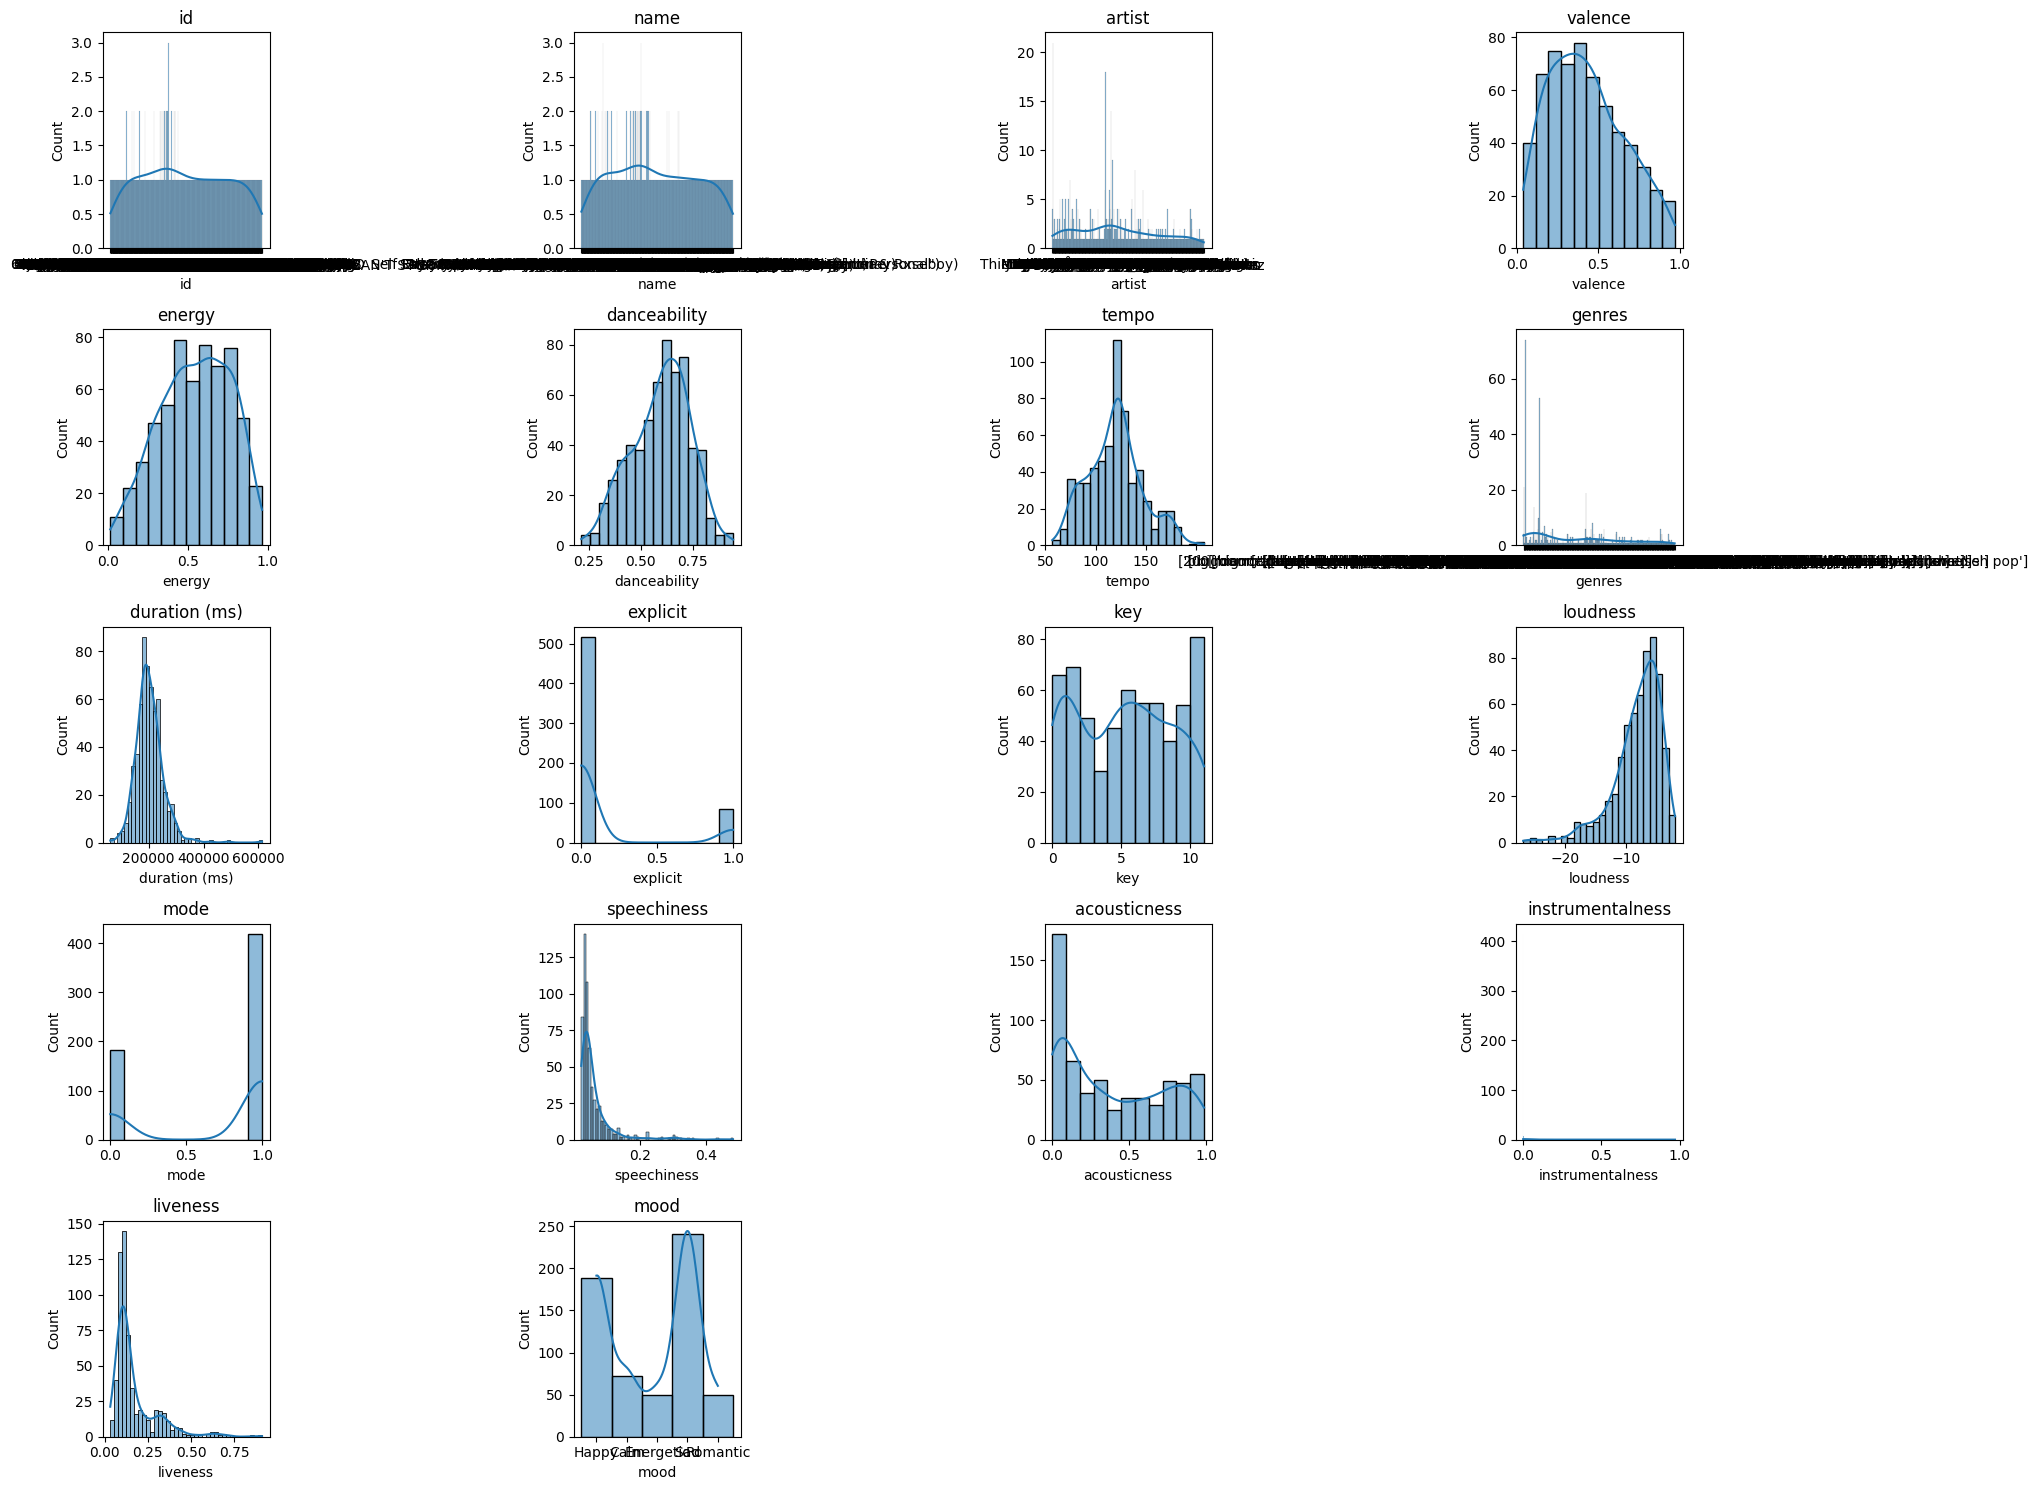

In [5]:
# Visualize the distribution of each feature
plt.figure(figsize = (20, 15))
for i, col in enumerate(df.columns):
  plt.subplot(5, 4, i + 1)
  sns.histplot(df[col], kde = True)
  plt.title(col)

plt.tight_layout()
plt.show()

##### **Feature Distributions:**

  1. **ID, Name, Artist, and Genres:**

        These are categorical features and show a high level of uniqueness, indicating that each track, artist, and genre are mostly distinct.

  2. **Valence:**

        This feature, representing musical positiveness, is approximately normally distributed with a slight skew towards higher values.

  3. **Energy:**

        Energy levels show a roughly normal distribution, peaking around the middle of the scale and tapering off towards the extremes.

  4. **Danceability:**

        Danceability is normally distributed, with most tracks having moderate danceability scores.

  5. **Tempo:**

        Tempo also shows a normal distribution, with a majority of tracks clustering around a common tempo range.

  6. **Duration (ms):**

        Track durations have a right-skewed distribution, with a majority of tracks having shorter durations and fewer tracks being longer.

  7. **Explicit:**

        This binary feature shows most tracks are non-explicit.

  8. **Key:**

        The key feature is fairly evenly distributed across its possible values.

  9. **Loudness:**

        Loudness is left-skewed, with most tracks having a higher negative value indicating they are generally quieter.

  10. **Mode:**

        This binary feature shows a higher count for one of the modes, suggesting a preference in the dataset.

  11. **Speechiness:**

        Speechiness has a right-skewed distribution, with most tracks having low speechiness values.

  12. **Acousticness:**

        Acousticness is somewhat bimodal, with peaks at low and high values, indicating a mix of acoustic and non-acoustic tracks.

  13. **Instrumentalness:**

        Instrumentalness shows a significant concentration of tracks with very low values, indicating most tracks have vocals.

  14. **Liveness:**

        Liveness is right-skewed, with most tracks having lower liveness values, suggesting they are studio recordings rather than live performances.

  15. **Mood:**

        This categorical feature shows the distribution of tracks across different moods. It appears to have a relatively balanced distribution with some moods being more prevalent.

In summary, most features show either normal or skewed distributions, with some categorical features indicating a high level of uniqueness. The dataset has a diverse range of tracks, with a mix of acoustic and non-acoustic, explicit and non-explicit, and varying levels of danceability, energy, and other musical attributes.

##### **Data Preprocessing**

Next, we need to preprocess the data by handling missing values, encoding categorical variables, and normalizing features.

In [6]:
# Convert genre list strings to a single string
df['genres'] = df['genres'].apply(lambda x: ', '.join(eval(x)))

# Rename column name to get rid of confusion
df = df.rename(columns = {'duration (ms)': 'duration_ms'})

# Handle missing values
df = df.dropna()

Below is the process to normalize features and encode the target variable.

In [7]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Features selection
features = ['valence', 'energy', 'danceability', 'tempo', 'duration_ms', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']
X = df[features]
y = df['mood']

# Standardize and normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode target variable
le = LabelEncoder()
y = le.fit_transform(y)

In [8]:
# Display preprocessed data
df.head()

,id,name,artist,valence,energy,danceability,tempo,genres,duration_ms,explicit,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,mood
0,331l3xABO0HMr1Kkyh2LZq,I Don't Wanna Wait,David Guetta,0.554,0.714,0.681,129.976,"big room, dance pop, edm, pop, pop dance",149668,False,1,-4.617,0,0.0309,0.03750,0.000000,0.2320,Happy
1,3aoZg6tWk6oV6FdtQkyNmt,Love Me Now (feat. Zoe Wees),Kygo,0.511,0.485,0.664,102.030,"edm, pop, pop dance, tropical house",195880,False,5,-7.017,1,0.0484,0.16300,0.000000,0.1920,Happy
2,4uUG5RXrOk84mYEfFvj3cK,I'm Good (Blue),David Guetta,0.304,0.965,0.561,128.040,"big room, dance pop, edm, pop, pop dance",175238,True,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,Happy
3,4QfikoJtCEiOj7G5R9m3sP,For Life (feat. Nile Rodgers),Kygo,0.585,0.791,0.571,122.085,"edm, pop, pop dance, tropical house",175803,False,1,-5.935,1,0.0741,0.04940,0.000000,0.0612,Happy
4,7j57nadsCph2KI9eYuaum8,The Hard Way,PNAU,0.657,0.906,0.691,119.978,"alternative dance, aussietronica, australian d...",183926,False,0,-4.458,1,0.1710,0.07200,0.000000,0.2990,Happy


##### **Handle Imbalanced Data**

To prevent model doesn't perform well because of the imbalanced data, we can use techniques like SMOTE to balance it.

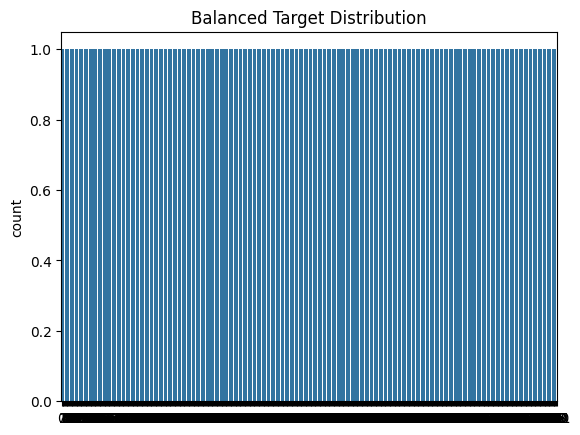

In [9]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state = 42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Displa the balanced target distribution
sns.countplot(y)
plt.title('Balanced Target Distribution')
plt.show()

##### **Split Data**

Define process to split data into training and testing sets.

In [12]:
from sklearn.model_selection import train_test_split

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2, random_state = 42)

# Display the shapes of the splits
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(964, 10) (241, 10) (964,) (241,)


##### **Train Model Using XGBoost**

The next step is train an XGBoost model on the training data, before do this task, we need to install XGBoost library using _'pip'_ because it's not available in this environment yet.

In [ ]:
!pip install xgboost

In [14]:
# Import xgboost library and its module
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [15]:
# Train the model
model = XGBClassifier(use_label_encoder = False, eval_metric = 'mlogloss', random_state = 42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [16]:
# Make prediction on test set and Evaluate the classifier
y_pred = model.predict(X_test)

print('XGBoost Baseline Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

XGBoost Baseline Accuracy: 0.7634854771784232
              precision    recall  f1-score   support

           0       0.76      0.67      0.71        52
           1       0.81      0.92      0.86        50
           2       0.82      0.75      0.78        48
           3       0.78      0.84      0.81        45
           4       0.64      0.63      0.64        46

    accuracy                           0.76       241
   macro avg       0.76      0.76      0.76       241
weighted avg       0.76      0.76      0.76       241

[[35  1  1  6  9]
 [ 1 46  3  0  0]
 [ 3  7 36  1  1]
 [ 0  0  1 38  6]
 [ 7  3  3  4 29]]


##### **Hyperparameter Tuning with GridSearchCV**

Use GridSearch to find the best hyperparameters for the model.

In [17]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Perform GridSearch
grid_search_xgb = GridSearchCV(estimator = XGBClassifier(use_label_encoder = False,
                                                         eval_metric = 'mlogloss',
                                                         random_state = 42),param_grid = param_grid_xgb, cv = 3, n_jobs = -1, verbose = 2)

# Fit grid search
grid_search_xgb.fit(X_train, y_train)

# Get the best estimator (for the model)
best_model_estimator = grid_search_xgb.best_estimator_

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [18]:
# Evaluate the best estimator for the model
y_pred = best_model_estimator.predict(X_test)

print('XGBoost Accuracy after Grid Search:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

XGBoost Accuracy after Grid Search: 0.7634854771784232
              precision    recall  f1-score   support

           0       0.81      0.65      0.72        52
           1       0.82      0.90      0.86        50
           2       0.77      0.77      0.77        48
           3       0.76      0.87      0.81        45
           4       0.64      0.63      0.64        46

    accuracy                           0.76       241
   macro avg       0.76      0.76      0.76       241
weighted avg       0.76      0.76      0.76       241

[[34  1  1  6 10]
 [ 1 45  4  0  0]
 [ 1  7 37  2  1]
 [ 0  0  1 39  5]
 [ 6  2  5  4 29]]


##### **Checking How the Recommender Model Works and Save the Best Model**

The next one is to chcek how the recommender song works. But before we do the task, we need to save the best model and scaler features for further process, that is build a dash-based web-app usinf _'joblib'_ and _'dash framework'_. We need to instal joblib library first.

In [19]:
!pip install joblib

Defaulting to user installation because normal site-packages is not writeable


In [20]:
import joblib

# Save the best model
joblib.dump(best_model_estimator, 'best_model.joblib')

['best_model.joblib']

In [21]:
# Save the scaler
joblib.dump(scaler, 'scaler.joblib')

['scaler.joblib']

In [25]:
# Load scaler and the best model
scaler = joblib.load('scaler.joblib')
best_model = joblib.load('best_model.joblib')

# Define features
features = ['valence', 'energy', 'danceability', 'tempo', 'duration_ms', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']

# Define function to show reccomendation
def recommend_similar_song(song_id, df, model, scaler, features):
    # Find the song in the dataset
    song = df[df['id'] == song_id]
    if song.empty:
        print('Song ID not found in the dataset.')
        return
    
    # Get the features of the song
    song_features = song[features]

    # Standardize the song features
    song_features_scaled = scaler.transform(song_features)

    # Predict the mood of the song
    predicted_mood = model.predict(song_features_scaled)

    # Find song with the same predicted mood
    recommended_songs = df[df['mood'] == predicted_mood[0]]

    # Display the recommended songs
    print(f'Recommendations for the song: {song['name'].values[0]} by {song['artist'].values[0]}')
    for i, (index, row) in enumerate(recommended_songs.iterrows(), start = 1):
        print(f'{i}. {row['name']} by {row['artist']} (Mood: {row['mood']})')

# Set up
song_id = '4h9wh7iOZ0GGn8QVp4RAOB'
recommend_similar_song(song_id, df, best_model, scaler, features)

Recommendations for the song: I Ain't Worried by OneRepublic


##### **Summary**

The use of XGBoost ensures robust mood prediction, while the Dash web app offers an intuitive interface for users to explore music that aligns with their emotional state. This project not only enhances user engagement on music streaming platforms but also demonstrates the potential of machine learning in personalizing digital experiences